## 图像分割SegNet

### 相关参考
- github链接：https://github.com/chainer/chainercv
- 官方文档链接：http://chainercv.readthedocs.io/en/stable/index.html
- 预训练模型下载页面：https://github.com/yuyu2172/share-weights/releases/
- SegNet参考的caffe实现及预训练模型：http://mi.eng.cam.ac.uk/projects/segnet/tutorial.html


由chainercv自带的预训练模型


### 采用的数据集为：camvid

- 数据集类别camvid_label_names：'Sky',  'Building',  'Pole',  'Road',  'Pavement',  'Tree',  'SignSymbol',  'Fence',  'Car',  'Pedestrian',  'Bicyclist'
- 不同类别的颜色camvid_label_colors：(128, 128, 128),  (128, 0, 0),  (192, 192, 128),  (128, 64, 128),  (60, 40, 222),  (128, 128, 0),  (192, 128, 128),  (64, 64, 128),  (64, 0, 128),  (64, 64, 0),  (0, 128, 192)


### 其中需要注意的是：

- (1)'pip install chainercv'好像没有load进去vis_semantic_segmentation模块，所以我的做法是从github中加到：/usr/local/lib/python3.5/dist-packages/chainercv/visualizations目录下（github该模块链接：https://github.com/chainer/chainercv/tree/master/chainercv/visualizations）
- (2)读图的时候，注意最好使用chainercv自带的读入函数utils.read_image

In [50]:
import argparse
import matplotlib.pyplot as plot
import chainer
from chainercv.datasets import camvid_label_colors
from chainercv.datasets import camvid_label_names
from chainercv.links import SegNetBasic
from chainercv import utils
from chainercv.visualizations import vis_image
from chainercv.visualizations.vis_semantic_segmentation import vis_semantic_segmentation

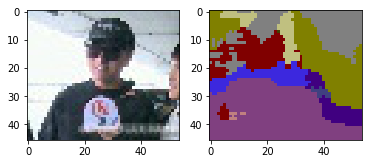

In [54]:
# pre-model + read picture
img = utils.read_image('/data1/research/face/age/data/test/noise/noise_46.jpg', color=True)
model = SegNetBasic(n_class = 11,pretrained_model  = 'camvid')
labels = model.predict([img])

# plot
label = labels[0]  # (332, 500)
fig = plot.figure()
ax1 = fig.add_subplot(1, 2, 1)
vis_image(img, ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
vis_semantic_segmentation(label, camvid_label_names, camvid_label_colors, ax=ax2)
plot.show()